## Time Series analysis

A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types:

Time series data: A set of observations on the values that a variable takes at different times.

Cross-sectional data: Data of one or more variables, collected at the same point in time.

Pooled data: A combination of time series data and cross-sectional data.

Terms and concepts:

Dependence: Dependence refers to the association of two observations with the same variable, at prior time points.

Stationarity: Shows the mean value of the series that remains constant over a time period; if past effects accumulate and the values increase toward infinity, then stationarity is not met.

Differencing: Used to make the series stationary, to De-trend, and to control the auto-correlations; however, some time series analyses do not require differencing and over-differenced series can produce inaccurate estimates.

Specification: May involve the testing of the linear or non-linear relationships of dependent variables by using models such as ARIMA, ARCH, GARCH, VAR, Co-integration, etc.

Exponential smoothing in time series analysis: This method predicts the one next period value based on the past and current value.  It involves averaging of data such that the nonsystematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term predication.  Alpha, Gamma, Phi, and Delta are the parameters that estimate the effect of the time series data.  Alpha is used when seasonality is not present in data.  Gamma is used when a series has a trend in data.  Delta is used when seasonality cycles are present in data.  A model is applied according to the pattern of the data.  Curve fitting in time series analysis: Curve fitting regression is used when data is in a non-linear relationship. The following equation shows the non-linear behavior:

Dependent variable, where case is the sequential case number.

Curve fitting can be performed by selecting “regression” from the analysis menu and then selecting “curve estimation” from the regression option. Then select “wanted curve linear,” “power,” “quadratic,” “cubic,” “inverse,” “logistic,” “exponential,” or “other.”


## Health Information Brazil
**Epidemiologicas and morbidity**
 Focus in a dataset about **Tuberculosis cases** extract from the TABNET 
 
 The data is related to the year/ month of the illness was diagnosticated in Brazil.


Font: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the file and show the information

In [2]:
url = "https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/Module%204/%20tuberculosis_year_month_diagnosy.csv"

tube = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=17, engine="python")
tube.head()

Ano Diagnóstico   Jan   Fev   Mar   Abr   Mai   Jun   Jul   Ago   Set  \
0             2001  8088  6542  8095  7305  7656  6805  6987  8065  6697   
1             2002  8013  7346  7961  8771  7784  6713  7746  8330  7654   
2             2003  8115  7985  7474  7975  8024  7082  7949  7585  8136   
3             2004  7574  6743  8574  8089  7763  7314  7825  8232  7901   
4             2005  7432  6748  8441  7958  8019  7781  7282  8391  7690   

    Out   Nov   Dez  Total  
0  7524  6874  6627  87265  
1  8200  7532  6809  92859  
2  8521  7624  7303  93773  
3  8016  7753  7196  92980  
4  7186  7587  7541  92056

In [3]:
tube.drop('Total', axis=1, inplace=True)
tube.head()

Ano Diagnóstico   Jan   Fev   Mar   Abr   Mai   Jun   Jul   Ago   Set  \
0             2001  8088  6542  8095  7305  7656  6805  6987  8065  6697   
1             2002  8013  7346  7961  8771  7784  6713  7746  8330  7654   
2             2003  8115  7985  7474  7975  8024  7082  7949  7585  8136   
3             2004  7574  6743  8574  8089  7763  7314  7825  8232  7901   
4             2005  7432  6748  8441  7958  8019  7781  7282  8391  7690   

    Out   Nov   Dez  
0  7524  6874  6627  
1  8200  7532  6809  
2  8521  7624  7303  
3  8016  7753  7196  
4  7186  7587  7541

### Challenge 1:
Transforme the data in a time series year-month using melt function from pandas, after rename the colunms.


In [4]:
tube_ts = tube.melt(id_vars = 'Ano Diagnóstico', value_name= 'Cases', var_name='Month')
tube_ts['Date'] = tube_ts['Ano Diagnóstico'].apply(str) + "-" + tube_ts['Month']

tube_ts

Ano Diagnóstico Month  Cases      Date
0               2001   Jan   8088  2001-Jan
1               2002   Jan   8013  2002-Jan
2               2003   Jan   8115  2003-Jan
3               2004   Jan   7574  2004-Jan
4               2005   Jan   7432  2005-Jan
..               ...   ...    ...       ...
223             2015   Dez   6844  2015-Dez
224             2016   Dez   6672  2016-Dez
225             2017   Dez   7020  2017-Dez
226             2018   Dez   6900  2018-Dez
227             2019   Dez   7220  2019-Dez

[228 rows x 4 columns]

### Challenge 2:
Convert the column Date (string) to Datetime

In [5]:
dict =  {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

new_date = []
for i  in tube_ts["Date"]:
  value = i.replace("-", " ")
  x = value.split()[1].replace(value.split()[1],dict[value.split()[1]])
  new_date.append(str(value.split()[0] +"-" +  x))

In [6]:
tube_ts['Date'] = new_date
tube_ts.head(5)

Ano Diagnóstico Month  Cases    Date
0             2001   Jan   8088  2001-1
1             2002   Jan   8013  2002-1
2             2003   Jan   8115  2003-1
3             2004   Jan   7574  2004-1
4             2005   Jan   7432  2005-1

In [7]:
tube_ts['Date'] = pd.to_datetime(tube_ts['Date'])
tube_ts['Date'].dt.strftime('%Y-%m')
tube_ts

Ano Diagnóstico Month  Cases       Date
0               2001   Jan   8088 2001-01-01
1               2002   Jan   8013 2002-01-01
2               2003   Jan   8115 2003-01-01
3               2004   Jan   7574 2004-01-01
4               2005   Jan   7432 2005-01-01
..               ...   ...    ...        ...
223             2015   Dez   6844 2015-12-01
224             2016   Dez   6672 2016-12-01
225             2017   Dez   7020 2017-12-01
226             2018   Dez   6900 2018-12-01
227             2019   Dez   7220 2019-12-01

[228 rows x 4 columns]

Reorganize the dataframe and keep only the columns that are relevant for the analysis of Time series

In [8]:
tube_tss = tube_ts[['Date', 'Cases']]
tube_tss

Date  Cases
0   2001-01-01   8088
1   2002-01-01   8013
2   2003-01-01   8115
3   2004-01-01   7574
4   2005-01-01   7432
..         ...    ...
223 2015-12-01   6844
224 2016-12-01   6672
225 2017-12-01   7020
226 2018-12-01   6900
227 2019-12-01   7220

[228 rows x 2 columns]

In [9]:
tube_tss.sort_values(['Date'], inplace=True)
tube_tss.reset_index(drop=True, inplace=True)
tube_tss

Date  Cases
0   2001-01-01   8088
1   2001-02-01   6542
2   2001-03-01   8095
3   2001-04-01   7305
4   2001-05-01   7656
..         ...    ...
223 2019-08-01   8239
224 2019-09-01   8143
225 2019-10-01   8592
226 2019-11-01   7615
227 2019-12-01   7220

[228 rows x 2 columns]

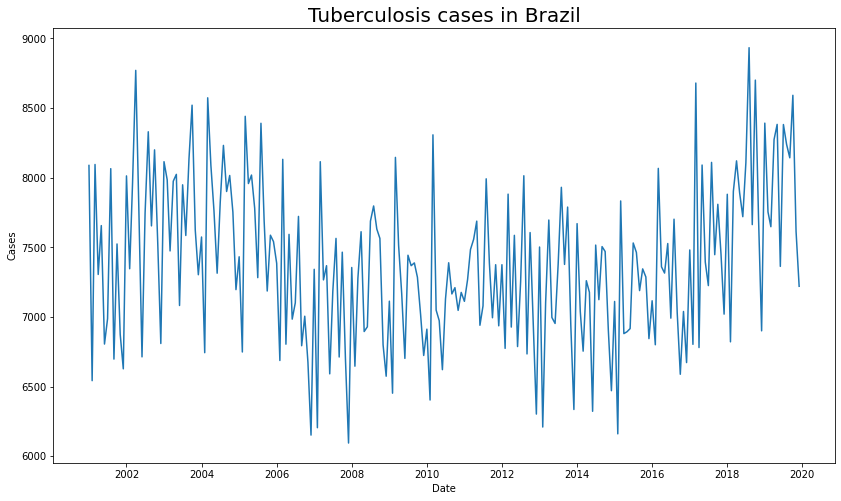

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
plt.title('Tuberculosis cases in Brazil', fontsize=20);

### Trendings and moving averages of time series

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

In [11]:
tube_tss['Cases'].rolling(3).mean()

0              NaN
1              NaN
2      7575.000000
3      7314.000000
4      7685.333333
          ...     
223    7994.666667
224    8254.666667
225    8324.666667
226    8116.666667
227    7809.000000
Name: Cases, Length: 228, dtype: float64

**Using the moving average window interval of 3 months in the plot bellow**

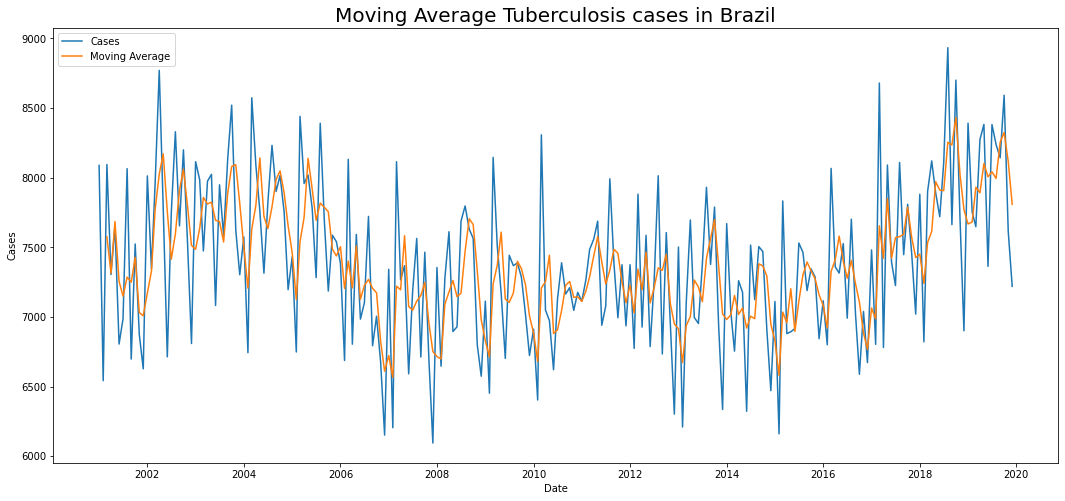

In [12]:
tube_tss['Moving_Average_3'] = tube_tss['Cases'].rolling(3).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_3', data=tube_tss)
plt.title('Moving Average Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average"]);

#### One alternative is to plot only the 50 first elements of the time series to understand the visualization.

Using the moving average window interval of 3 months, and 3 months centered window in the plot bellow.

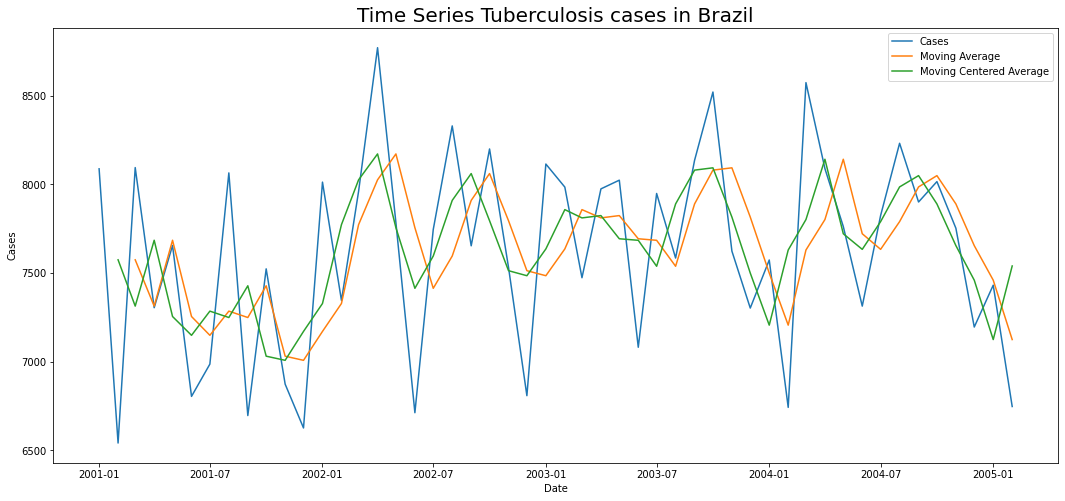

In [13]:
#Using a variable igual 3 centred
tube_tss['Moving_Average_3c'] = tube_tss['Cases'].rolling(3, center=True).mean()

tube_tss['Moving_Average_3'] = tube_tss['Cases'].rolling(3).mean()

plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss[:50])
sns.lineplot(x= 'Date', y='Moving_Average_3', data=tube_tss[:50])
sns.lineplot(x= 'Date', y='Moving_Average_3c', data=tube_tss[:50])
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

**Using the moving average window interval of 6 months, and 6 window months centered in the plot bellow.**

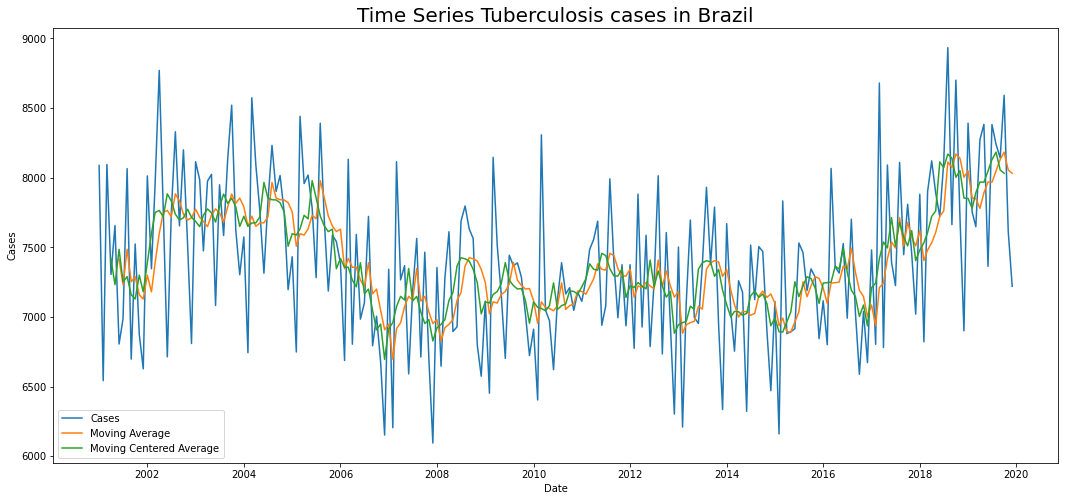

In [14]:
tube_tss['Moving_Average_6'] = tube_tss['Cases'].rolling(6).mean()
tube_tss['Moving_Average_6c'] = tube_tss['Cases'].rolling(6, center=True).mean()

plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6c', data=tube_tss)
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

**Using the moving average window interval of 9 months, and 9 months centered in the plot bellow.**


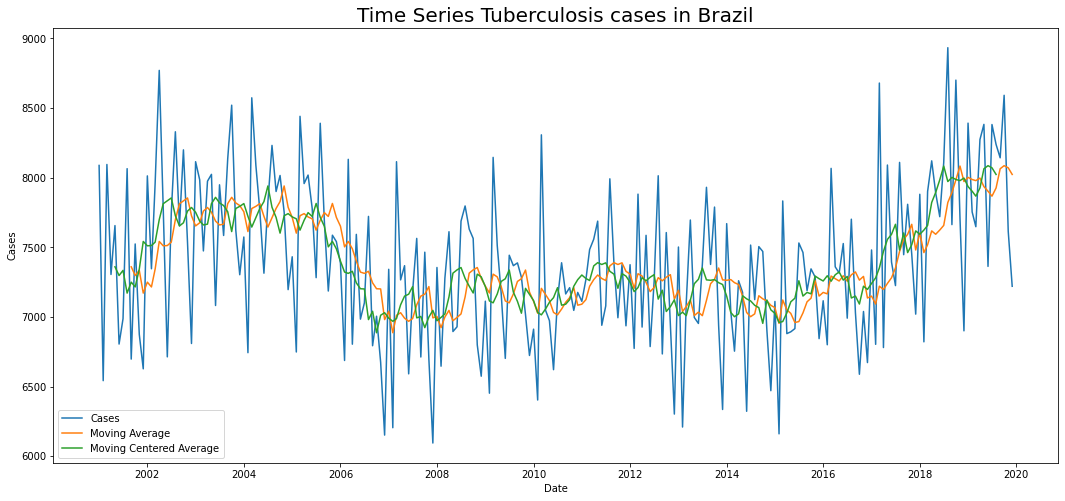

In [15]:
tube_tss['Moving_Average_9'] = tube_tss['Cases'].rolling(9).mean()
tube_tss['Moving_Average_9c'] = tube_tss['Cases'].rolling(9, center=True).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_9', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_9c', data=tube_tss)
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

**Using the moving average window interval of 12 months, and 12 months centered in the plot bellow.**

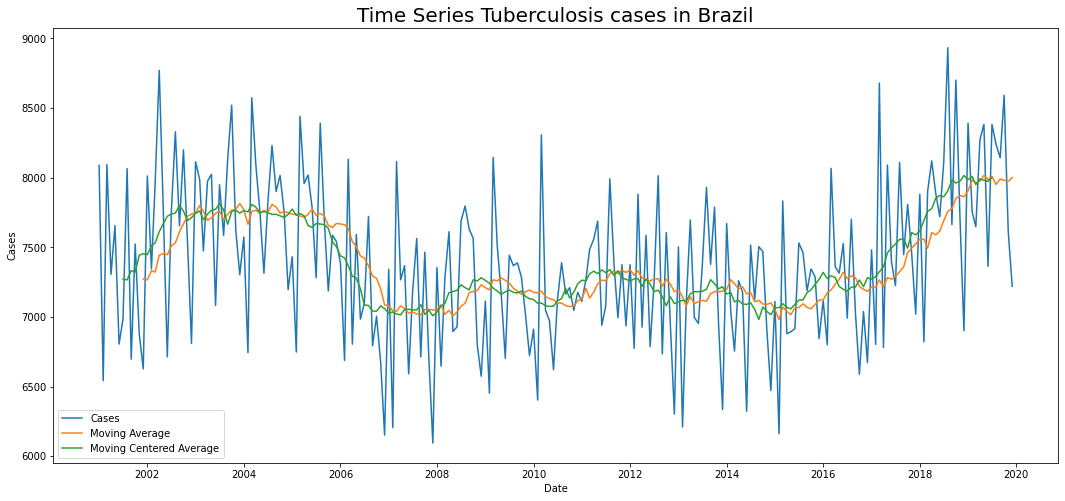

In [16]:
tube_tss['Moving_Average_12'] = tube_tss['Cases'].rolling(12).mean()
tube_tss['Moving_Average_12c'] = tube_tss['Cases'].rolling(12, center=True).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_12', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_12c', data=tube_tss)
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

### Aula 4: Decomposition and autocorrelation

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing for analyzing functions or series of values, such as time domain signals.

Different fields of study define autocorrelation differently, and not all of these definitions are equivalent. In some fields, the term is used interchangeably with autocovariance.

Unit root processes, trend-stationary processes, autoregressive processes, and moving average processes are specific forms of processes with autocorrelation.

<AxesSubplot:xlabel='Date', ylabel='Cases'>

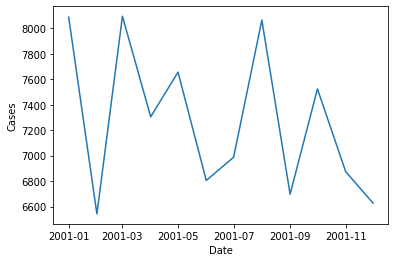

In [17]:
sns.lineplot(x='Date', y='Cases', data=tube_tss[:12])

<AxesSubplot:xlabel='Date', ylabel='Cases'>

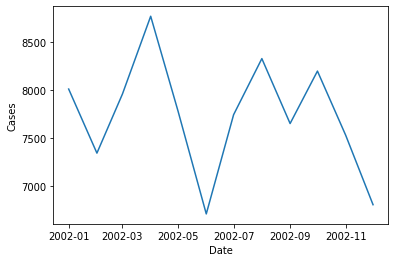

In [18]:
sns.lineplot(x='Date', y='Cases', data=tube_tss[12:24])

<AxesSubplot:xlabel='Date', ylabel='Cases'>

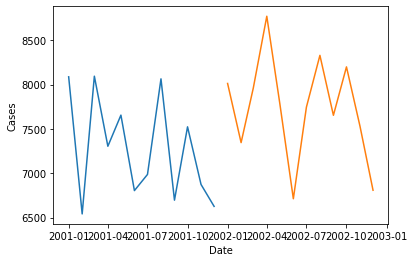

In [19]:
sns.lineplot(x='Date', y='Cases', data=tube_tss[:12])
sns.lineplot(x='Date', y='Cases', data=tube_tss[12:24])

In [20]:
tube_tss['Year'] = tube_tss['Date'].dt.year
tube_tss['Month'] = tube_tss['Date'].dt.month

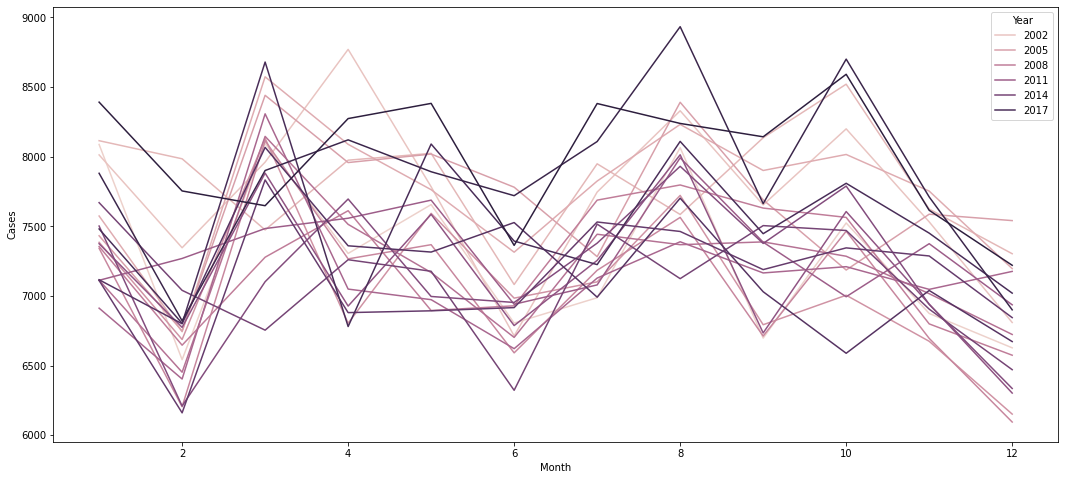

In [21]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Month', y='Cases', data=tube_tss, hue='Year');

We did not get any conclusion by plot the cases seasonality by month using lineplot.
The best way to understand and calculate the seasonality is to use the Statsmodels library
**Apply Statsmodels.tsa.seasonal and import the method seasonal_decompose**

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
tube_tss.head()

Date  Cases  Moving_Average_3  Moving_Average_3c  Moving_Average_6  \
0 2001-01-01   8088               NaN                NaN               NaN   
1 2001-02-01   6542               NaN        7575.000000               NaN   
2 2001-03-01   8095       7575.000000        7314.000000               NaN   
3 2001-04-01   7305       7314.000000        7685.333333               NaN   
4 2001-05-01   7656       7685.333333        7255.333333               NaN   

   Moving_Average_6c  Moving_Average_9  Moving_Average_9c  Moving_Average_12  \
0                NaN               NaN                NaN                NaN   
1                NaN               NaN                NaN                NaN   
2                NaN               NaN                NaN                NaN   
3        7415.166667               NaN                NaN                NaN   
4        7231.666667               NaN             7360.0                NaN   

   Moving_Average_12c  Year  Month  
0                 NaN  2001      1  
1                 NaN  2001      2  
2                 NaN  2001      3  
3                 NaN  2001      4  
4                 NaN  2001      5

In [24]:
decomp = seasonal_decompose(tube_tss[['Date','Cases']].set_index('Date'), freq= 12)

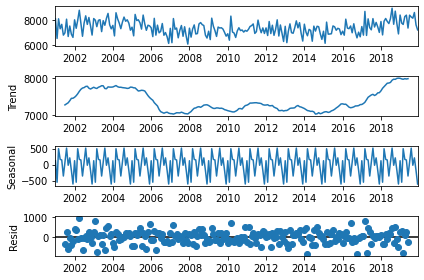

In [25]:
decomp.plot();

 #### Improving visualization by added a frequence interval, in this case 12 months, set title and size for the figure.

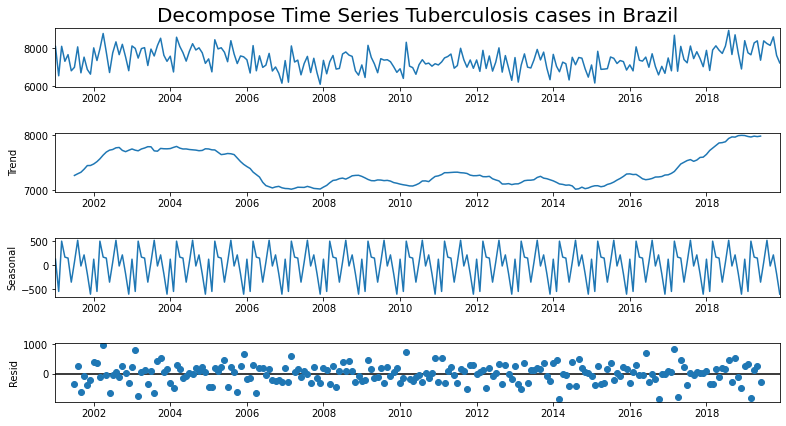

In [26]:
decompose_p = seasonal_decompose(tube_tss[['Date','Cases']].set_index('Date'), freq= 12)
figure = decompose_p.plot()
figure.axes[0].set_title('Decompose Time Series Tuberculosis cases in Brazil', fontsize=20)
figure.set_size_inches(12,6)

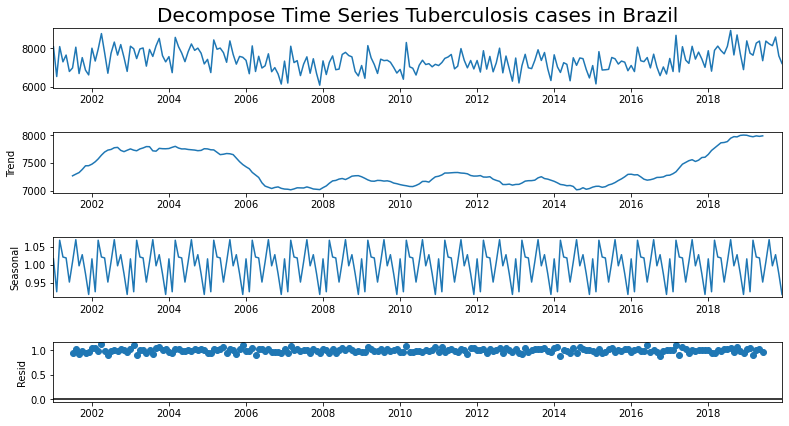

In [27]:
decomp_p = seasonal_decompose(tube_tss[['Date','Cases']].set_index('Date'),model = 'multiplicative', freq= 12)
figure = decomp_p.plot()
figure.axes[0].set_title('Decompose Time Series Tuberculosis cases in Brazil', fontsize=20)
figure.set_size_inches(12,6)

### Example

Load a different Dataset as example to better understand the concept of seasonal decompose.
The dataset is available in the git hub and is related to a number of passagers of one Air company along a determined period.

In [28]:
url = 'https://github.com/alura-cursos/serie_temporal_bootcamp/raw/main/AirPassengers.csv'

In [29]:
passengers = pd.read_csv('https://github.com/alura-cursos/serie_temporal_bootcamp/raw/main/AirPassengers.csv')
passengers.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

Transforme the column month in Datetime as was dispaly as object initial.

In [30]:
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


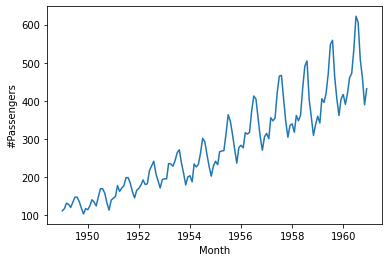

In [31]:
sns.lineplot(x='Month', y='#Passengers', data= passengers);

### Autocorrelation and partial autocorrelation respectivelly  for passengers dataset

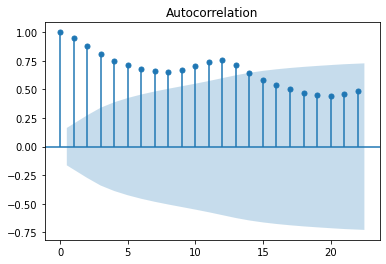

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(passengers['#Passengers']);

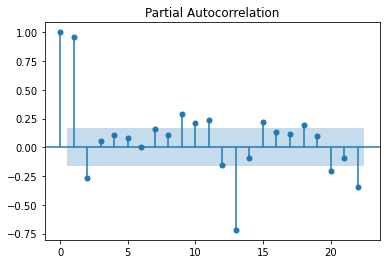

In [33]:
plot_pacf(passengers['#Passengers']);

The plot above shows a well distributed seasonality, it is possible to vizualize certain similar tendency in different periods.

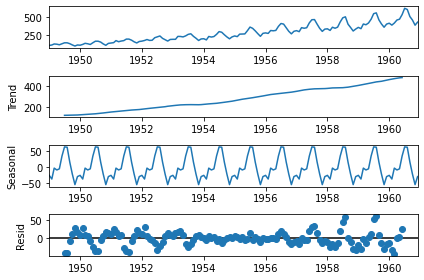

In [34]:
decomp_pass = seasonal_decompose(passengers.set_index('Month'))
decomp_pass.plot();

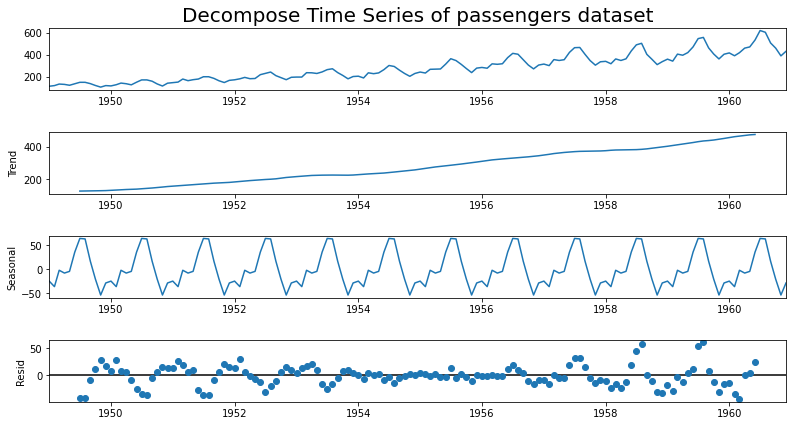

In [35]:
decomp_pass = seasonal_decompose(passengers.set_index('Month'), freq=12)
figure = decomp_pass.plot()
figure.axes[0].set_title('Decompose Time Series of passengers dataset', fontsize=20)
figure.set_size_inches(12,6)

### Classe 4 - Autocorrelation and Partial Autocorrelation

Plotting autocorrelation and partial correlation for the Tuberculosis dataset

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

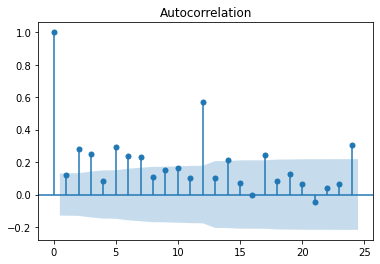

In [37]:
plot_acf(tube_tss['Cases']);

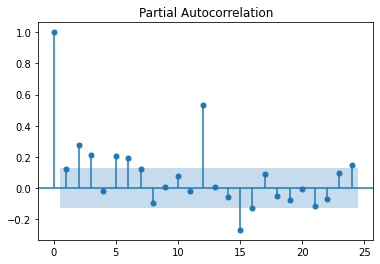

In [38]:
plot_pacf(tube_tss['Cases']);

### Class 5 - Time series forecasts

Work with the passengers dataset here.

In [39]:
passengers.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [40]:
passengers.rename({'Month': 'Date'}, axis=1, inplace=True)
passengers['Month'] = passengers['Date'].dt.month
passengers['Year'] = passengers['Date'].dt.year
passengers.head(3)

Date  #Passengers  Month  Year
0 1949-01-01          112      1  1949
1 1949-02-01          118      2  1949
2 1949-03-01          132      3  1949

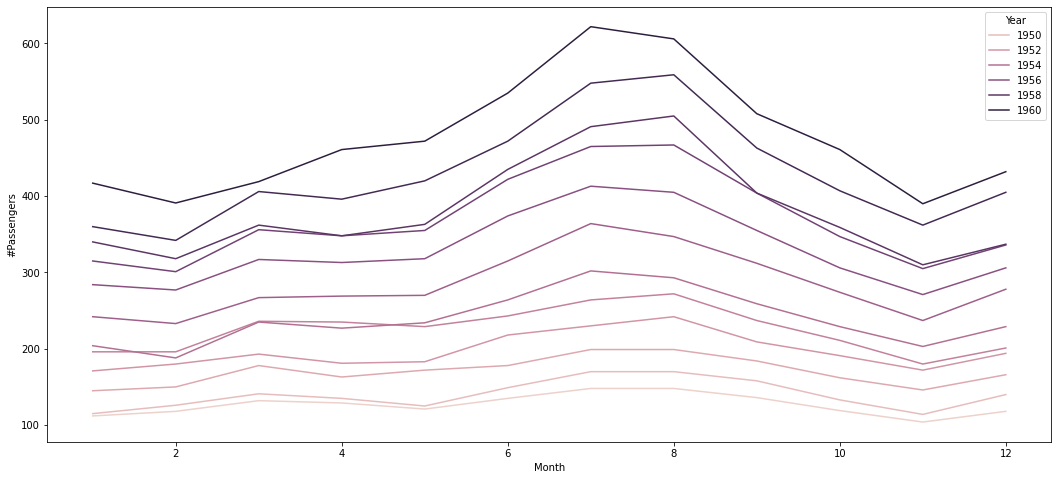

In [41]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Month', y='#Passengers', data=passengers, hue='Year');

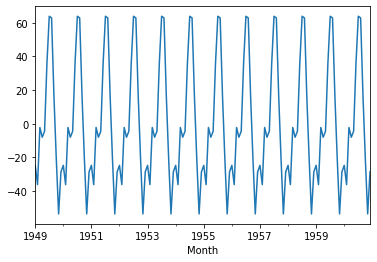

In [42]:
decomp_pass.seasonal.plot();

#### This dataset is from US, from plot the seasonal decompose we can see that the increase near to 20% from June to midle August reflect the Summer holiday season in US, while it is evident the drop in November because of begginer of winter season.

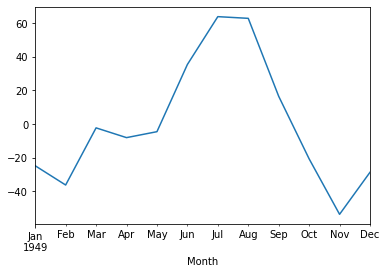

In [43]:
decomp_pass.seasonal[:12].plot();

## Tuberculosis Dataset
Same here we are going to investigate the seasonal information using decompose.
The first plot we are observing the seasonal decompose in the 2000

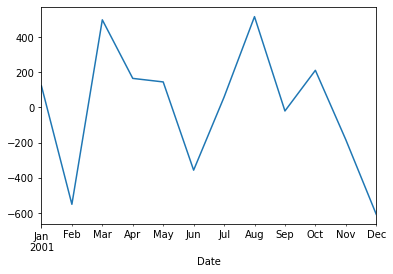

In [44]:
figure = decompose_p.seasonal[:12].plot();

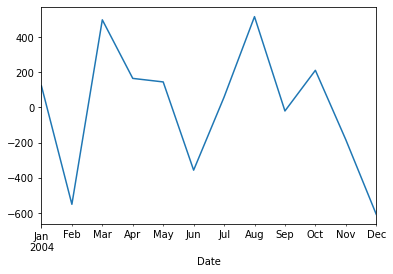

In [45]:
figure = decompose_p.seasonal[36:48].plot();

### Class 5: Forecast using model ARIMA

Autoregressive Integrated Moving Average ARIMA(p,d,q) Model.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function

If exogenous variables are given, then the model that is fit is

ϕ(L)(yt−Xtβ)=θ(L)ϵt
where ϕ and θ are polynomials in the lag operator, L. This is the regression model with ARMA errors, or ARMAX model. This specification is used, whether or not the model is fit using conditional sum of square or maximum-likelihood, using the method argument in statsmodels.tsa.arima_model.ARIMA.fit. Therefore, for now, css and mle refer to estimation methods only. This may change for the case of the css model in future versions.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html#statsmodels.tsa.arima_model.ARIMAResults.forecast

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
##Split the data to forecast and understand whatI am predicting is in line with the reality
train_set = tube_tss.query('Year != 2019')
test_set = tube_tss.query('Year == 2019')

The model forecast results bring back the mean value of a 12 month forecast.
**Train the model**

**order** iterable

The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

ARMA is a combination of MA and AR.

p = 1 and(d, q = 0) represent a autoregressive model [1,0,0]

d = (differenciation) ensures better model performance. [0,1,1], in case I do not want differenciatio [0,1,0]   

q = [0,0,1] Is considered a Moving Average model, which can be atribute any value, this is a MA equal 1.

The theoretical ACF and PACF for the AR, MA, and ARMA conditional mean models are known, and are different for each model. These differences among models are important to keep in mind when you select models.
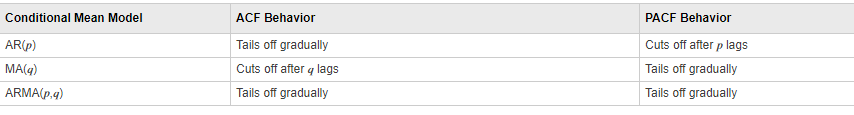


**Stationary and Nonstationary**

 We can think of a stationary time series as having a mean and variance that are constant through time. Stationarity then simply refers to a system that exhibits stationary behavior through time. Nonstationarity then refers to something that is changing over time.
 
font: https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html?s_tid=srchtitle

In [49]:
model_arima = ARIMA(train_set['Cases'].values.astype('float32'), order = [12,1,1])
model_arima_train = model_arima.fit()
model_arima_train

The method forecast will have the follow returns:
  
$forecast$ **ndarray**

Array of out of sample forecasts

$stderr$ **ndarray**

Array of the standard error of the forecasts.

$conf_int$ **ndarray**

2d array of the confidence interval for the forecast  

**Notes**

Prediction is done in the levels of the original endogenous variable. If you would like prediction of differences in levels use predict.

In [50]:
forecast = model_arima_train.forecast(12)
forecast

array([8128.55015897, 7224.23032095, 8098.01611137, 8139.93270454,
       7807.23170029, 7927.25665541, 8044.50557009, 8492.42387236,
       7915.334286  , 8509.29246342, 7808.15669895, 7432.1950108 ])

**Test the model**

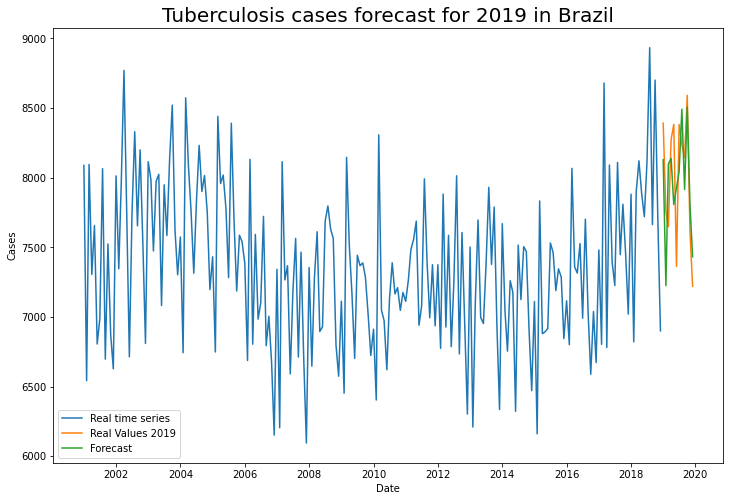

In [51]:
plt.figure(figsize=(12,8))

test_set['forecast'] = forecast
sns.lineplot(x ='Date', y='Cases', data=train_set)
sns.lineplot(x ='Date', y='Cases', data=test_set)
sns.lineplot(x ='Date', y='forecast', data=test_set)
plt.title('Tuberculosis cases forecast for 2019 in Brazil', fontsize=20)
plt.legend(["Real time series","Real Values 2019","Forecast"]);

### Class 6: AUTOARIMA and Prophet

Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In order to find the best model, auto-ARIMA optimizes for a given information_criterion, one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion, Corrected Akaike Information Criterion, Bayesian Information Criterion, Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value.

Font: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [52]:
#pip install pmdarima

In [53]:
from pmdarima.arima import auto_arima

In [54]:
model_autoarima  = auto_arima(train_set['Cases'].values, error_action='ignore', trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=2.25 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.40 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.82 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=1.07 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3195.913, Time=4.59 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

In [55]:
model_autoarima.predict(12)

array([8168.63391787, 7360.79990432, 8307.76600385, 8123.15001283,
       8071.39464137, 7824.59040495, 8122.40661611, 8597.22390371,
       7950.30504488, 8338.81923688, 7893.25860895, 7414.47500797])

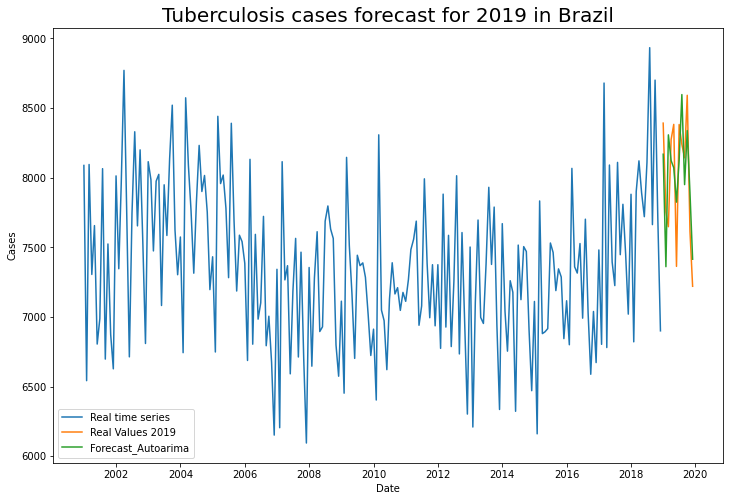

In [56]:
forecast_autoarima = model_autoarima.predict(12)
plt.figure(figsize=(12,8))

test_set['forecast_autoarima'] = forecast_autoarima
sns.lineplot(x ='Date', y='Cases', data=train_set)
sns.lineplot(x ='Date', y='Cases', data=test_set)
sns.lineplot(x ='Date', y='forecast_autoarima', data=test_set)
plt.title('Tuberculosis cases forecast for 2019 in Brazil', fontsize=20)
plt.legend(["Real time series","Real Values 2019","Forecast_Autoarima"])

### Test which is the best model to forecast the cases. Compare ARIMA and Autoarima using Sklearn library

We can assume by using mean square error that the lower and best value in this case the auto_arima perform better.

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
results_autoarima = mean_squared_error(test_set['Cases'], test_set['forecast_autoarima'])
results_arima = mean_squared_error(test_set['Cases'], test_set['forecast'])
print(f'Auto_arima = {results_autoarima}')
print(f'Arima = {results_arima}')

Auto_arima = 115408.54489069484
Arima = 128298.2980086785


### Prophet model from Facebook

In [59]:
#pip install pystan

In [60]:
#pip install fbprophet

In [61]:
from fbprophet import Prophet 

ModuleNotFoundError: No module named 'fbprophet'

### Challenge 3:
Search for other dataset and work to transform in a time series.

I choose the dataset from Datasus related to LEPROSY cases contact diagnostics in Brazil.

## Leprosy

#### Introduction
Leprosy is a chronic condition with high potential for causing disability and stigma perpetuating the vicious circle of poverty. A significant decrease of incidence rates after introduction of the multidrug therapy can be observed, but the disease is still a cause of morbidity, especially in vulnerable populations. In addition, the impact on mortality patterns from direct or indirect causes related to the disease is present, especially in the male population.

Leprosy cases are not distributed homogeneously in Brazil, with areas of higher risk mainly located in the Midwest, North, and Northeast regions. The ten clusters with the highest risk of occurrence of new cases (NC) are located mainly in the states of Mato Grosso, Pará, Maranhão, Tocantins, Goiás, Rondônia, and Bahia; together, they account for 44% of all cases diagnosed in 2013. In 2014, the state of Bahia ranked thirteenth in the national ranking of new case detection rates with 17.4 new leprosy cases per 100,000 inhabitants, higher than the Brazilian average (15.3 cases per 100,000 inhabitants).

In [62]:
url = 'https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/Module%204/A152724189_28_143_208.csv'
leprosy = pd.read_csv(url,encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=11, engine="python" )
leprosy.head()

Ano Diagnóstico Jan Fev Mar Abr Mai Jun Jul Ago Set Out Nov Dez  Total
0           <1975  28   8  12  14  14  17  17  14  12  23  21  21    201
1            1975   -   1   -   -   -   -   -   -   -   -   -   1      2
2            1976   -   -   -   2   1   2   -   -   2   -   1   -      8
3            1977   2   -   -   1   -   -   -   -   -   1   1   -      5
4            1978   -   -   -   -   -   2   1   2   -   1   -   -      6

Decided to drop the first 25 rows as most of the years does not have data fill in, and at the same time keep the same format as the Tuberculosis time series.

In [63]:
leprosy.drop('Total', axis=1, inplace=True)
leprosy.drop(leprosy.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]], inplace=True)
leprosy.head(3)

Ano Diagnóstico   Jan   Fev   Mar   Abr   Mai   Jun   Jul   Ago   Set  \
26            2000   189   188   148   124   143   177   141   228   218   
27            2001  4107  4103  4787  4135  4724  3940  4116  4890  4035   
28            2002  3982  4065  4566  5027  4663  4488  4971  5281  4805   

     Out   Nov   Dez  
26   305   370   610  
27  4728  4197  3250  
28  5151  4679  3545

In [64]:
leprosy.tail()

Ano Diagnóstico   Jan   Fev   Mar   Abr   Mai   Jun   Jul   Ago   Set  \
41            2015  2729  2969  3476  2930  3017  2969  3018  3244  3241   
42            2016  2393  2540  3000  2702  2616  2957  2603  3113  2881   
43            2017  2585  2718  3162  2557  3243  2806  2739  3288  2856   
44            2018  2971  2877  3276  3157  3237  2913  2976  3644  3274   
45            2019  3105  3319  2804  3037  3047  2567  2856  3107  3060   

     Out   Nov   Dez  
41  3075  2819  2412  
42  2644  2528  2213  
43  3275  2961  2448  
44  3423  2909  2268  
45  3137  2715  1886

In [65]:
lep_ts = leprosy.melt(id_vars = 'Ano Diagnóstico', value_name= 'Cases', var_name='Month')
lep_ts['Date'] = lep_ts['Ano Diagnóstico'].apply(str) + "-" +lep_ts['Month']
lep_ts.head()

Ano Diagnóstico Month Cases      Date
0            2000   Jan   189  2000-Jan
1            2001   Jan  4107  2001-Jan
2            2002   Jan  3982  2002-Jan
3            2003   Jan  4127  2003-Jan
4            2004   Jan  4168  2004-Jan

In [66]:
dict =  {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

new_day = []
for i  in lep_ts["Date"]:
  value = i.replace("-", " ")
  x = value.split()[1].replace(value.split()[1],dict[value.split()[1]])
  new_day.append(str(value.split()[0] +"-" +  x))

In [67]:
lep_ts['Date'] = new_day
lep_ts.head(5)

Ano Diagnóstico Month Cases    Date
0            2000   Jan   189  2000-1
1            2001   Jan  4107  2001-1
2            2002   Jan  3982  2002-1
3            2003   Jan  4127  2003-1
4            2004   Jan  4168  2004-1

In [68]:
lep_ts['Date'] = pd.to_datetime(lep_ts['Date'])
lep_ts['Date'].dt.strftime('%Y-%m')
lep_ts

Ano Diagnóstico Month Cases       Date
0              2000   Jan   189 2000-01-01
1              2001   Jan  4107 2001-01-01
2              2002   Jan  3982 2002-01-01
3              2003   Jan  4127 2003-01-01
4              2004   Jan  4168 2004-01-01
..              ...   ...   ...        ...
235            2015   Dez  2412 2015-12-01
236            2016   Dez  2213 2016-12-01
237            2017   Dez  2448 2017-12-01
238            2018   Dez  2268 2018-12-01
239            2019   Dez  1886 2019-12-01

[240 rows x 4 columns]

In [69]:
lep_ts['Cases'] = lep_ts['Cases'].astype(str).astype(int)

In [70]:
lep_tss = lep_ts[['Date', 'Cases']]
lep_tss = lep_tss.sort_values(by ='Date')

lep_tss.head()

Date  Cases
0  2000-01-01    189
20 2000-02-01    188
40 2000-03-01    148
60 2000-04-01    124
80 2000-05-01    143

In [71]:
lep_tss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    240 non-null    datetime64[ns]
 1   Cases   240 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 4.7 KB


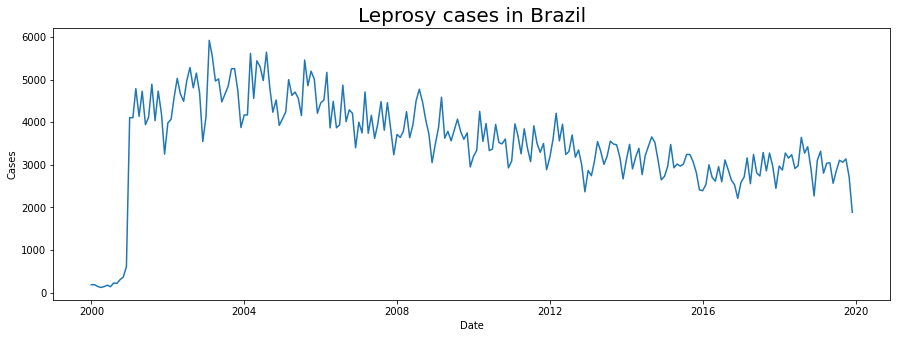

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot(data= lep_tss, x='Date', y='Cases')
plt.title('Leprosy cases in Brazil', fontsize=20);

In [73]:
import plotly.express as px
fig = px.line(data_frame=lep_tss,x="Date",y="Cases",title="Time Series Leprosy")
fig.show()

### Challenge 5:
Analyse other windows for the moving average, and thinking about the impacts when big windows are used. 

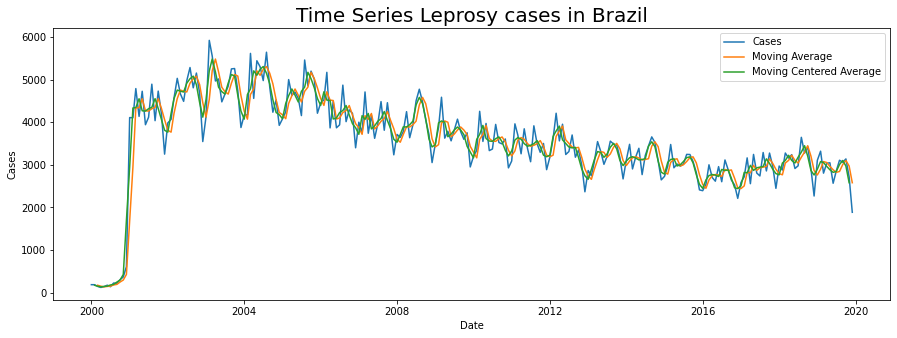

In [74]:
lep_tss['Moving_Average_3c'] = lep_tss['Cases'].rolling(3, center=True).mean()

lep_tss['Moving_Average_3'] = lep_tss['Cases'].rolling(3).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x= 'Date', y='Cases', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_3', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_3c', data=lep_tss)
plt.title('Time Series Leprosy cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

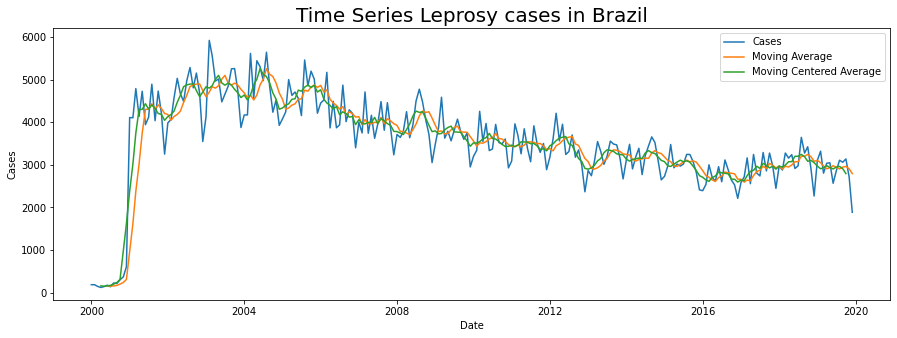

In [75]:
lep_tss['Moving_Average_6'] = lep_tss['Cases'].rolling(6).mean()
lep_tss['Moving_Average_6c'] = lep_tss['Cases'].rolling(6, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x= 'Date', y='Cases', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6c', data=lep_tss)
plt.title('Time Series Leprosy cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

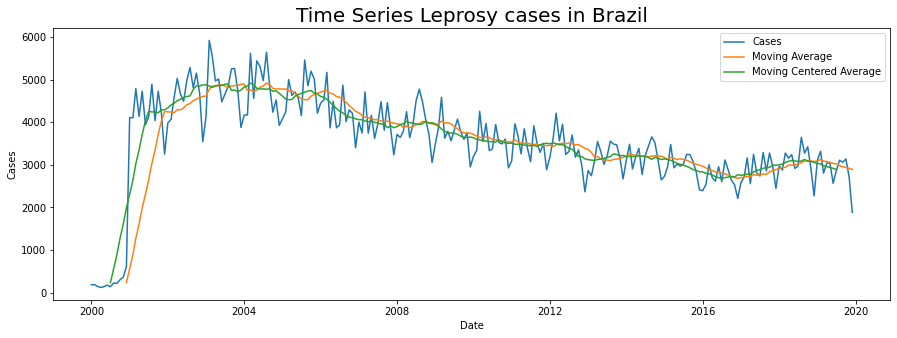

In [76]:
lep_tss['Moving_Average_12'] = lep_tss['Cases'].rolling(12).mean()
lep_tss['Moving_Average_12c'] = lep_tss['Cases'].rolling(12, center=True).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x= 'Date', y='Cases', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_12', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_12c', data=lep_tss)
plt.title('Time Series Leprosy cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

### Autocorrelation and partial correlation for cases of Leprosy

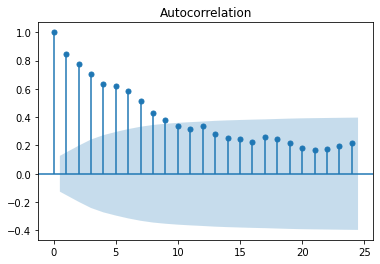

In [77]:
plot_acf(lep_tss['Cases']);

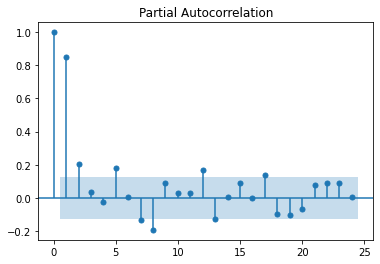

In [78]:
plot_pacf(lep_tss['Cases']);

### Tuberculosis vs Leprosy Cases in Brazil

By comparing Tuberculosis and Leprosy cases in Brazil from 2000 to 2020 using Time Series we can assume by applied the moving average line that Tuberculosis cases exponentially start to grow in the last 4 years, while Leprosy cases start smoothly decrease since 2006.

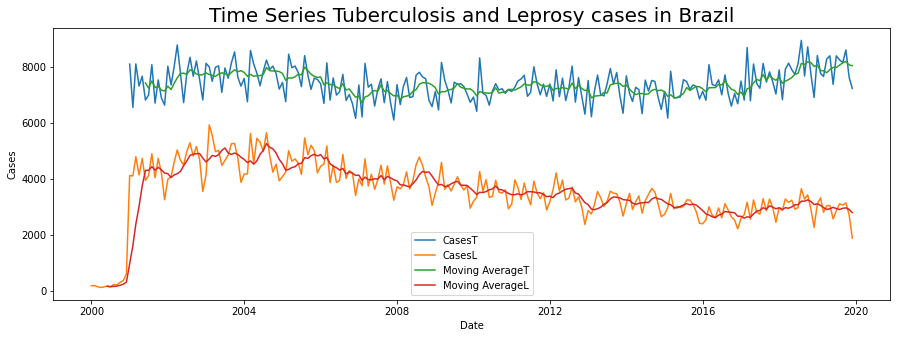

In [79]:
tube_tss['Moving_Average_6'] = tube_tss['Cases'].rolling(6).mean()
lep_tss['Moving_Average_6'] = lep_tss['Cases'].rolling(6).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x= 'Date', y='Cases', data=tube_tss)
sns.lineplot(x= 'Date', y='Cases', data=lep_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6', data=tube_tss)
sns.lineplot(x= 'Date', y='Moving_Average_6', data=lep_tss)
plt.title('Time Series Tuberculosis and Leprosy cases in Brazil', fontsize=20)
plt.legend(["CasesT","CasesL","Moving AverageT","Moving AverageL"]);

### Challenge 6:
Create the first forecast using mean for all time series from the last month

In [80]:
lep_tss.head()

Date  Cases  Moving_Average_3c  Moving_Average_3  Moving_Average_6  \
0  2000-01-01    189                NaN               NaN               NaN   
20 2000-02-01    188         175.000000               NaN               NaN   
40 2000-03-01    148         153.333333        175.000000               NaN   
60 2000-04-01    124         138.333333        153.333333               NaN   
80 2000-05-01    143         148.000000        138.333333               NaN   

    Moving_Average_6c  Moving_Average_12  Moving_Average_12c  
0                 NaN                NaN                 NaN  
20                NaN                NaN                 NaN  
40                NaN                NaN                 NaN  
60              161.5                NaN                 NaN  
80              153.5                NaN                 NaN

#### Challenge 8:

Format graphics of decompose, add title, modify size.
Make the decompose of other time series and analyse the results.

Here we are going to plot some graphics related to the Leprosy dataset.

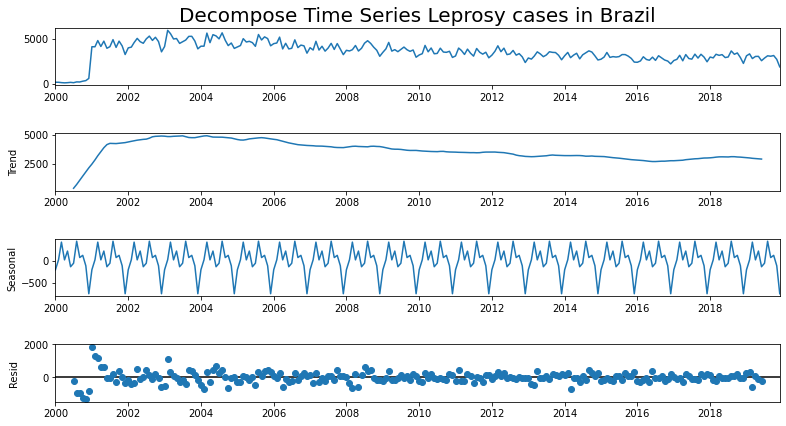

In [81]:
decompose_p = seasonal_decompose(lep_tss[['Date','Cases']].set_index('Date'), period= 12)
figure = decompose_p.plot()
figure.axes[0].set_title('Decompose Time Series Leprosy cases in Brazil', fontsize=20)
figure.set_size_inches(12,6)

### Forecast Time Series with Arima,  LEPROSY dataset

In [82]:
lep_tss['Month'] = lep_tss['Date'].dt.month
lep_tss['Year'] = lep_tss['Date'].dt.year
lep_tss.head()

Date  Cases  Moving_Average_3c  Moving_Average_3  Moving_Average_6  \
0  2000-01-01    189                NaN               NaN               NaN   
20 2000-02-01    188         175.000000               NaN               NaN   
40 2000-03-01    148         153.333333        175.000000               NaN   
60 2000-04-01    124         138.333333        153.333333               NaN   
80 2000-05-01    143         148.000000        138.333333               NaN   

    Moving_Average_6c  Moving_Average_12  Moving_Average_12c  Month  Year  
0                 NaN                NaN                 NaN      1  2000  
20                NaN                NaN                 NaN      2  2000  
40                NaN                NaN                 NaN      3  2000  
60              161.5                NaN                 NaN      4  2000  
80              153.5                NaN                 NaN      5  2000

In [83]:
train_set = lep_tss.query('Year != 2019')
test_set = lep_tss.query('Year == 2019')

#Train
model_arima = ARIMA(train_set['Cases'].values.astype('float32'), order= [4,1,2])
model_arima_train = model_arima.fit()

In [84]:
forecast_lep = model_arima_train.forecast(12)
forecast_lep

array([2658.03116293, 2769.20800361, 2888.84095917, 2825.03066668,
       2622.1563876 , 2503.54239742, 2579.55611587, 2774.87204009,
       2894.91207356, 2819.67986452, 2624.8925879 , 2505.17485846])

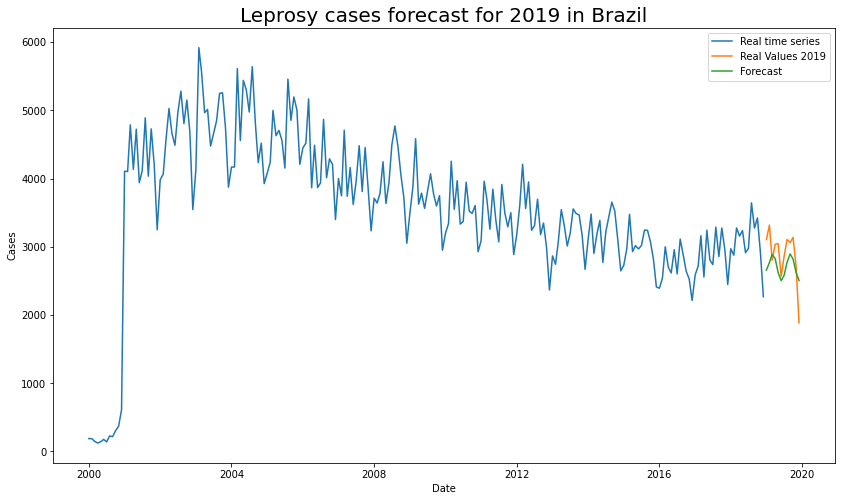

In [85]:
#Test
plt.figure(figsize=(14,8))

test_set['forecast'] = forecast_lep
sns.lineplot(x ='Date', y='Cases', data=train_set)
sns.lineplot(x ='Date', y='Cases', data=test_set)
sns.lineplot(x ='Date', y='forecast', data=test_set)
plt.title('Leprosy cases forecast for 2019 in Brazil', fontsize=20)
plt.legend(["Real time series","Real Values 2019","Forecast"]);

In [86]:
model_autoarimaLep  = auto_arima(train_set['Cases'].values, error_action='ignore', trace=True, seasonal= True, m=12)
model_autoarimaLep.predict(12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3420.165, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3513.935, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3438.342, Time=0.75 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3456.546, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3512.000, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3459.230, Time=1.64 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3443.495, Time=2.10 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3420.223, Time=5.89 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3422.380, Time=5.34 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3495.019, Time=0.52 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3451.524, Time=4.05 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3430.705, Time=4.31 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=3416.791, Time=5.31 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.23 sec
 ARIMA(2,1,1)(2,0,2)[12]

array([2621.57207705, 2706.67768645, 3003.80333273, 2764.55531726,
       2896.46920033, 2643.44562982, 2673.09179382, 3094.38024046,
       2833.74242814, 2850.52767811, 2599.82710806, 2114.32589344])

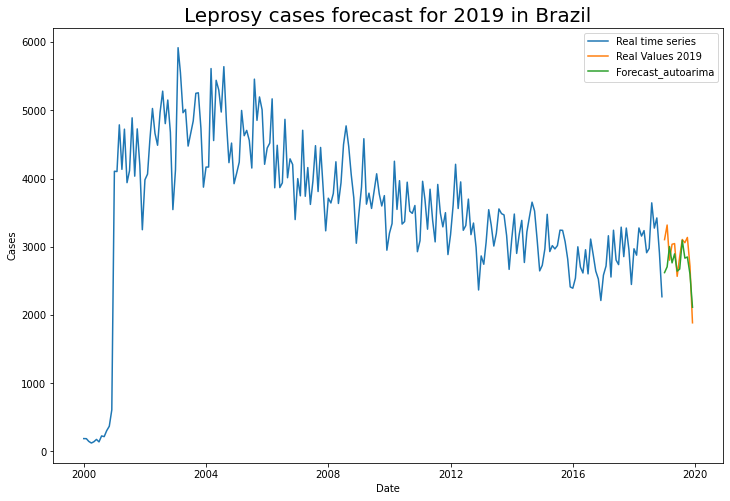

In [87]:

forecast_autoarima = model_autoarimaLep.predict(12)
plt.figure(figsize=(12,8))

test_set['forecast_autoarima'] = forecast_autoarima
sns.lineplot(x ='Date', y='Cases', data=train_set)
sns.lineplot(x ='Date', y='Cases', data=test_set)
sns.lineplot(x ='Date', y='forecast_autoarima', data=test_set)
plt.title('Leprosy cases forecast for 2019 in Brazil', fontsize=20)
plt.legend(["Real time series","Real Values 2019","Forecast_autoarima"])

In [88]:
results_autoarima = mean_squared_error(test_set['Cases'], test_set['forecast_autoarima'])
results_arima = mean_squared_error(test_set['Cases'], test_set['forecast'])
print(f'Auto_arima = {results_autoarima}')
print(f'Arima = {results_arima}')

Auto_arima = 81963.59701257537
Arima = 120406.12294036108


 ### Challenge 9:
 
 Create a visualization of time series differenciated (tips: use 'diff' from Pandas)